# tensorflow实现逻辑斯蒂回归

In [ ]:
1. 找到预测函数: 1 / (1 + e^-z)
2. 找到损失函数 -(y_true*log(y_pred) + (1-y_true)log(1 - y_pred))
3. 梯度下降法求损失最小的时候的系数

In [2]:
import tensorflow as tf
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

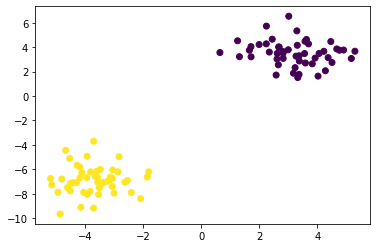

In [3]:
data, target = make_blobs(centers=2)
plt.scatter(data[:, 0], data[:, 1], c=target)

In [6]:
x = tf.constant(data, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

In [7]:
x.shape

TensorShape([100, 2])

In [8]:
y.shape

TensorShape([100])

In [9]:
# 定义预测函数
W = tf.Variable(np.random.randn(2, 1) * 0.02, dtype=tf.float32)
B = tf.Variable(0., dtype=tf.float32)

In [10]:
np.dot(x, np.random.randn(2, 1)).shape

(100, 1)

In [11]:
def sigmoid(x):
    linear = tf.matmul(x, W) + B
    return tf.nn.sigmoid(linear)

In [12]:
a = tf.constant([[1, 2, 3], [4, 5, 6]])

In [13]:
a.reshape()

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()
      

In [14]:
tf.reshape(a, [3, 2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>

In [16]:
tf.reshape(a, [6])

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6])>

In [17]:
# 定义损失
def cross_entropy_loss(y_true, y_pred):
    # 对y_pred进行截断
    y_pred = tf.reshape(y_pred, shape=[100])
#     y_pred = tf.clip_by_value(y_pred, 1e-9, 1)
    return tf.reduce_mean(-(tf.multiply(y_true, tf.math.log(y_pred)) + tf.multiply((1 - y_true), tf.math.log(1 - y_pred)))) 

In [18]:
# 定义优化器
optimizer = tf.optimizers.SGD()

In [19]:
def run_optimization():
    with tf.GradientTape() as g:
        # 计算预测值
        pred = sigmoid(x)
        loss = cross_entropy_loss(y, pred)
        
    # 计算梯度
    gradients = g.gradient(loss, [W, B])
    # 更新W,B
    optimizer.apply_gradients(zip(gradients, [W, B]))

In [20]:
target

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [21]:
# 计算准确率
def accuracy(y_true, y_pred):
    # 需要把概率变成类别.
    # 概率大于0.5 可以认为是正例. 
    y_pred = tf.reshape(y_pred, shape=[100])
    y_ = y_pred.numpy() > 0.5
    y_true = y_true.numpy()
    return (y_ == y_true).mean()

In [22]:
# 定义训练过程
for i in range(5000):
    run_optimization()
    
    if i % 100 == 0:
        pred = sigmoid(x)
        acc = accuracy(y, pred)
        loss = cross_entropy_loss(y, pred)
        print(f'训练次数: {i}, 准确率: {acc}, 损失: {loss}')

训练次数: 0, 准确率: 1.0, 损失: 0.5070534348487854
训练次数: 100, 准确率: 1.0, 损失: 0.03960507735610008
训练次数: 200, 准确率: 1.0, 损失: 0.021695207804441452
训练次数: 300, 准确率: 1.0, 损失: 0.015156402252614498
训练次数: 400, 准确率: 1.0, 损失: 0.011725024320185184
训练次数: 500, 准确率: 1.0, 损失: 0.009597694501280785
训练次数: 600, 准确率: 1.0, 损失: 0.008144221268594265
训练次数: 700, 准确率: 1.0, 损失: 0.0070855035446584225
训练次数: 800, 准确率: 1.0, 损失: 0.006278482731431723
训练次数: 900, 准确率: 1.0, 损失: 0.0056420802138745785
训练次数: 1000, 准确率: 1.0, 损失: 0.005126800388097763
训练次数: 1100, 准确率: 1.0, 损失: 0.0047007291577756405
训练次数: 1200, 准确率: 1.0, 损失: 0.004342292435467243
训练次数: 1300, 准确率: 1.0, 损失: 0.004036395810544491
训练次数: 1400, 准确率: 1.0, 损失: 0.0037721586413681507
训练次数: 1500, 准确率: 1.0, 损失: 0.003541510086506605
训练次数: 1600, 准确率: 1.0, 损失: 0.0033383560366928577
训练次数: 1700, 准确率: 1.0, 损失: 0.0031580065842717886
训练次数: 1800, 准确率: 1.0, 损失: 0.0029967883601784706
训练次数: 1900, 准确率: 1.0, 损失: 0.0028517653699964285
训练次数: 2000, 准确率: 1.0, 损失: 0.002720590913668275
训练次数: 2100, 准确率: 1.0

# keras入门

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 手写数字 mnist, cifar10
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train[2]

4

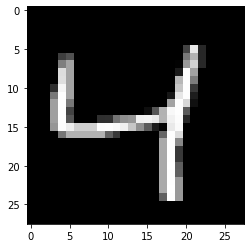

In [6]:
plt.imshow(x_train[2].reshape(28, 28), cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
y_train.dtype

dtype('uint8')

In [10]:
# 对数据做处理
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# tf.one_hot()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
28*28

784

In [12]:
x_train.dtype

dtype('float64')

In [ ]:
# 一层网络叫做一层Dense

In [13]:
from tensorflow.keras.layers import Dense

In [14]:
# 定义神经网络.
model = tf.keras.Sequential()
# 第一层要多写一个参数, 叫做输入数据的维度. 
# 输入维度有两种写法, 第一种是input_shape, 必须是一个元组, 不要写样本个数, 只需要写特征的维度即可.
# input_dim, 不需要写元组, 直接指定具体的数字即可
model.add(Dense(64, activation='relu', input_shape=(784, )))
# model.add(Dense(64, activation='relu', input_dim=784))
# 出了第一层需要传输入数据的维度, 其他层不需要, keras会自动的帮我们计算维度.
model.add(Dense(64, activation='relu'))
# 输出层的激活, 二分类是sigmoid, 多分类的话是softmax
model.add(Dense(10, activation='softmax'))

In [15]:
# 配置网络
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 训练网络
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), )

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.1228 - val_accuracy: 0.9750
Epoch 2/20
120/938 [==>...........................] - ETA: 2s - loss: 0.0081 - accuracy: 0.99

limit_output extension: Maximum message size of 10000 exceeded with 10044 characters

In [18]:
# 查看网络设置
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
784*64+64

50240

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1778 - accuracy: 0.9750


[0.17775821685791016, 0.9750000238418579]

In [22]:
# 保存模型 HDF5 分层的数据结构.
model.save('./model.h5')

In [23]:
# 加载
model2 = tf.keras.models.load_model('./model.h5')

In [24]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1778 - accuracy: 0.9750


[0.17775821685791016, 0.9750000238418579]

In [25]:
x_test.shape

(10000, 784)

In [26]:
# 预测
model.predict(x_test, ).shape

313/313 [==============================] - 1s 1ms/step


(10000, 10)